In [1]:
# Allow importing from the code directory.
import sys
sys.path.append('../code/')

In [2]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix
from etch import load_census, teska, predict_probabilities, ys, plot_learning_curve, scale_target_transform


In [3]:
quantitative = [
    "age",
    "weeks worked in year",
    "num persons worked for employer",
    "dividends from stocks",
    "capital gains",
    "capital losses",
    "wage per hour",
]

qualitative = [
    'education',
    'sex',
    'detailed household and family stat',
    'major occupation code',
    'tax filer stat',
    'detailed occupation recode',
    'detailed industry recode',
    'hispanic origin',
    'class of worker',
    'race',
    'marital stat',
    'full or part time employment stat',
    'major industry code',
]

In [4]:
census = load_census()
model = HistGradientBoostingClassifier(random_state=42)
# ros = RandomOverSampler(random_state=42)
transformer = scale_target_transform(quantitative, qualitative)

In [5]:
pipeline, (X_train_encoded, y_train_encoded), (X_test_encoded, y_test_encoded) = teska(model, census, sampler=None, transformer=transformer)


In [6]:
y_train_probabilities = predict_probabilities(pipeline, census.X_train, y_train_encoded)

In [7]:
ys(y_train_encoded, y_train_probabilities, threshold=0.5)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    187141
           1       0.75      0.47      0.58     12382

    accuracy                           0.96    199523
   macro avg       0.86      0.73      0.78    199523
weighted avg       0.95      0.96      0.95    199523

[[185171   1970]
 [  6567   5815]]


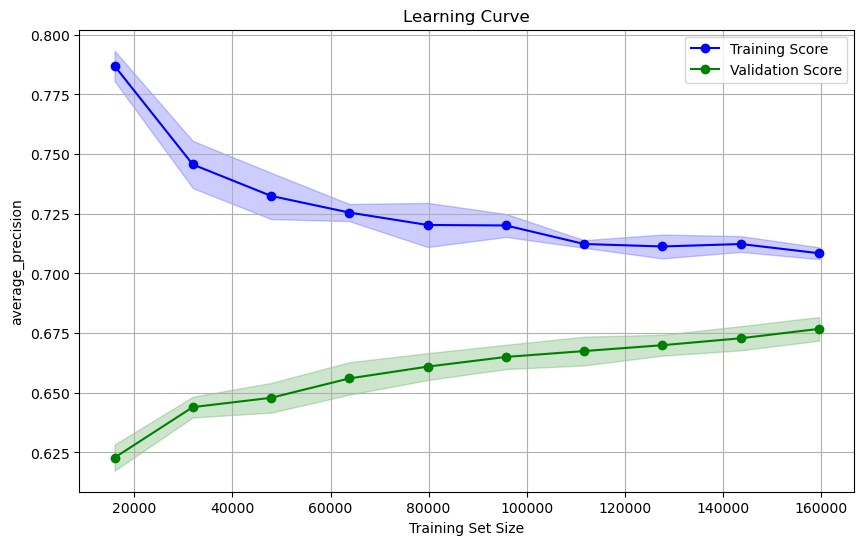

In [8]:
plot_learning_curve(pipeline, census.X_train, y_train_encoded, scoring='average_precision', save_path='../results/learning_curve.png')


In [9]:
y_test_predictions = pipeline.predict(census.X_test)


In [10]:
print(classification_report(y_test_encoded, y_test_predictions))
confusion_matrix(y_test_encoded, y_test_predictions)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     93576
           1       0.74      0.47      0.57      6186

    accuracy                           0.96     99762
   macro avg       0.85      0.73      0.78     99762
weighted avg       0.95      0.96      0.95     99762



array([[92568,  1008],
       [ 3286,  2900]])